<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Постановка задачи</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

## Постановка задачи
В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
#Изучим общую информацию о датасете:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('C:/Users/antig/Downloads/Яндекс Практикум/real_estate_data.csv', sep='\t')

df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00


Столбцы в датасете оказались объединены в одну строку, поэтому необходимо было добавить параметр sep='\t' при чтении файла .csv. После добавления для проверки разделения столбцов, вывели первые 10 строк файла. 

## Предобработка данных

In [4]:
#Определим долю пропусков в столбцах датасета:
df.isna().mean()

total_images           0.00
last_price             0.00
total_area             0.00
first_day_exposition   0.00
rooms                  0.00
ceiling_height         0.39
floors_total           0.00
living_area            0.08
floor                  0.00
is_apartment           0.88
studio                 0.00
open_plan              0.00
kitchen_area           0.10
balcony                0.49
locality_name          0.00
airports_nearest       0.23
cityCenters_nearest    0.23
parks_around3000       0.23
parks_nearest          0.66
ponds_around3000       0.23
ponds_nearest          0.62
days_exposition        0.13
dtype: float64

Рассмотрим пропуски и выберем те столбцы, где их необходимо заполнить:  
- *высота потолков:* возможна причина пропусков в том,что человек не знает этот параметр или просто пропустил при заполнении данных. Эти пропуски можно заполнить средним значением.  
- *всего этажей в доме:* возможно случайный пропуск. Количество пропусков незначительное, по отношению к общему количеству данных, и параметр не такой важный, как этаж квартиры, поэтому эти строки можно оставить в неизменном виде.  
- *жилая площадь в квадратных метрах (м²):* параметр важный, однако, нельзя заполнить пропуски средним или медианным значениями, так как у нас слишком большой разброс этих данных.  
- *апартаменты:* скорее всего эти квартиры не являются апартаментами, поэтому такое количество пропущенных значений. Это Булев тип данных, поэтому не будем вносить никаких изменений.  
- *площадь кухни:* определим долю площади кухни в общей площади квартиры с помощью расчетов и заполним эти пропуски с учетом вычислений.  
- *число балконов:* возможно в этих квартирах нет балконов и поэтому при заполнении этот параметр пропустили, заменим значения на 0.  
- *locality_name- 49*- название населенного пункта:пропуски могут быть случайными,количество их незначительно по отношению ко всему датасету, поэтому заполнять их не будем
- *airports_nearest- 5542*- расстояние до аэропорта: возможно эти квартиры находятся рядом или, наоборот, слишком далеко от аэропорта, или человек просто не знает точное расстояние до аэропорта  
- *cityCenters_nearest- 5519*- расстояние до центра города: либо эти квартиры находятся в центре, либо просто человеку неизвестен этот параметр. 
- *parks_around3000- 5518*- число парков в радиусе 3 км: возможно парков рядом с этими квартирами нет в радиусе 3 км, поэтому параметру можно присвоить значение 0.  
- *parks_nearest- 15620*- расстояние до ближайшего парка: возможно этот параметр человеку неизвестен, для нашего анализа он не важен, поэтому не будем заполнять в нем пропуски  
- *ponds_around3000- 5518*- число водоёмов в радиусе 3 км: рядом с этими квартирами может не быть водоема на этом расстоянии, для расчетов этот параметр не важен. 
- *ponds_nearest- 14589*- расстояние до ближайшего водоема: либо неизвестно расстояние, либо водоем находится слишком далеко, либо его вообще нет поблизости. 
- *days_exposition- 3181*- сколько дней было размещено объявление (от публикации до снятия):объявление могли снять сразу в день публикации, если квартиру купили или если человек передумал размещать объявление.

In [5]:
# Заполним пропуски:
df['balcony'] = df['balcony'].fillna(0)
df['parks_nearest'] = df['parks_nearest'].fillna(0)
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(0)
df['days_exposition'] = df['days_exposition'].fillna(0)
df['ceiling_height'] = df['ceiling_height'].fillna(2.65)
df['is_apartment'] = df['is_apartment'].fillna('None')
df = df.dropna(subset=['floors_total', 'locality_name'])
#df.dropna(subset=['floors_total'])
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest         0
parks_around3000         5500
parks_nearest               0
ponds_around3000         5500
ponds_nearest           14529
days_exposition             0
dtype: int64

In [6]:
#Определим долю, занимаемую кухней в общей площади квартиры, для заполнения пропусков в параметре 'kitchen_area':
df['ratio_kitchen_total'] = df['kitchen_area'] / df['total_area']

#Создаем датафрейм со средним значением 'ratio_kitchen_mean':
ratio_kitchen_mean = df.groupby('rooms')[['ratio_kitchen_total']].mean()
ratio_kitchen_mean.columns = ['ratio_kitchen_mean']

#Объединяем датафрейм с основным датасетом:
df = df.merge(ratio_kitchen_mean, on='rooms', how='left')
#df.head(10)

#Считаем среднее значение площади кухни, в зависимости от количества комнат:
df['kitchen_area_new'] = df['ratio_kitchen_mean'] * df['total_area']

#Заполняем пропуски в основном столбце:
df['kitchen_area'] = df['kitchen_area'].fillna(value=df['kitchen_area_new'])
#Создадим дополнительный датафрейм, чтобы проверить работу кода(в основном датасете не вижу эти столбцы):
#df_kitchen_add = df[['kitchen_area', 'total_area']]
#df_kitchen_add.head(30)                    

#Определим количество пропусков в столбце с площадью кухни после преобразований:
len(df[df['kitchen_area'].isna()])

194

194 - число пропусков в тех квартирах, где площадь кухни изначально равна 0(квартиры-студии)

In [7]:
#Определим типы данных для каждого столбца в таблице:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
ratio_kitchen_total     float64
ratio_kitchen_mean      float64
kitchen_area_new        float64
dtype: object

In [8]:
#Выполним преобразование данных типа float64 к целочисленному int64 для данных, необходимых в дальнейших расчетах:
df['days_exposition'] = df['days_exposition'].astype(int)
df['balcony'] = df['balcony'].astype(int)
df['floors_total'] = df['floors_total'].astype(int)
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total              int32
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   int32
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition           int32
ratio_kitchen_total     float64
ratio_kitchen_mean      float64
kitchen_area_new        float64
dtype: object

In [9]:
#Определим уникальные названия населённых пунктов, встречающиеся в датасете:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [10]:
df['locality_name'].value_counts()

Санкт-Петербург                                            15651
посёлок Мурино                                               520
посёлок Шушары                                               439
Всеволожск                                                   398
Пушкин                                                       369
                                                           ...  
садоводческое некоммерческое товарищество Лесная Поляна        1
поселок Усть-Луга                                              1
коттеджный посёлок Лесное                                      1
деревня Новолисино                                             1
посёлок Платформа 69-й километр                                1
Name: locality_name, Length: 364, dtype: int64

In [11]:
#Заменим дубликаты в столбце 'locality_name':
df['locality_name']=df['locality_name'].str.replace("посёлок", "поселок")
df['locality_name']=df['locality_name'].str.replace("поселок городского типа", "пгт")
df['locality_name']=df['locality_name'].str.replace("городской поселок", "пгт")
df['locality_name']=df['locality_name'].str.replace("садоводческое некоммерческое товарищество", "снт")

In [12]:
#Проверим работу кода и вызовем столбец отдельно:
df_add = df[['locality_name']]
df_add.head(30)

,locality_name
0,Санкт-Петербург
1,поселок Шушары
2,Санкт-Петербург
3,Санкт-Петербург
4,Санкт-Петербург
5,пгт Янино-1
6,поселок Парголово
7,Санкт-Петербург
8,поселок Мурино
9,Санкт-Петербург


In [13]:
#Проверим, сохранились ли изменения в столбце после обработки:
df['locality_name'].value_counts()

Санкт-Петербург               15651
поселок Мурино                  552
поселок Шушары                  439
Всеволожск                      398
Пушкин                          369
                              ...  
поселок Гончарово                 1
садовое товарищество Садко        1
коттеджный поселок Счастье        1
деревня Пижма                     1
деревня Тойворово                 1
Name: locality_name, Length: 323, dtype: int64

## Расчёты и добавление результатов в таблицу

In [14]:
# Определим цену за квадратный метр:
df['price_per_meter2'] = df['last_price'] / df['total_area']
#Определим день недели, месяц и год публикации каждого объявления о продаже:
df['time'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M')
df['weekday'] = df['time'].dt.weekday
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,ratio_kitchen_total,ratio_kitchen_mean,kitchen_area_new,price_per_meter2,time,weekday,month,year
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,None,...,755.00,0,0.23,0.14,15.21,"120,370.37",2019-03-07,3,3,2019
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,2.65,11,18.60,1,None,...,NaN,81,0.27,0.25,10.09,"82,920.79",2018-12-04,1,12,2018
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,2.65,5,34.30,4,None,...,574.00,558,0.15,0.17,9.75,"92,785.71",2015-08-20,3,8,2015
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,2.65,14,NaN,9,None,...,234.00,424,NaN,0.14,22.39,"408,176.10",2015-07-24,4,7,2015
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,None,...,48.00,121,0.41,0.17,17.41,"100,000.00",2018-06-19,1,6,2018


In [15]:
#Определим этаж квартиры("первый", "последний" или "другой"):
def floors_category(row):
    floor = row['floor']
    if floor == 1:
        return 'первый'
    if floor == row['floors_total'] and floor != 1:
        return 'последний'
    return 'другой'

df['floors_category'] = df.apply(floors_category, axis=1)
df['floors_category'].value_counts()

другой       17326
последний     3330
первый        2909
Name: floors_category, dtype: int64

In [16]:
#Добавим столбец отношение жилой площади к общей:
df['living_total_area'] = df['living_area'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ratio_kitchen_total,ratio_kitchen_mean,kitchen_area_new,price_per_meter2,time,weekday,month,year,floors_category,living_total_area
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,None,...,0.23,0.14,15.21,"120,370.37",2019-03-07,3,3,2019,другой,0.47
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,2.65,11,18.60,1,None,...,0.27,0.25,10.09,"82,920.79",2018-12-04,1,12,2018,первый,0.46
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,2.65,5,34.30,4,None,...,0.15,0.17,9.75,"92,785.71",2015-08-20,3,8,2015,другой,0.61
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,2.65,14,NaN,9,None,...,NaN,0.14,22.39,"408,176.10",2015-07-24,4,7,2015,другой,NaN
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,None,...,0.41,0.17,17.41,"100,000.00",2018-06-19,1,6,2018,другой,0.32


## Исследовательский анализ данных

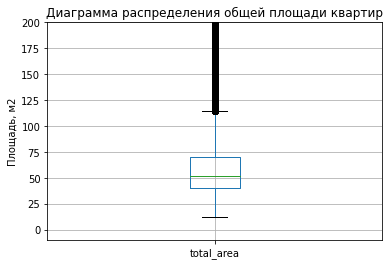

In [17]:
#Построим диаграмму размаха значений параметра общая площадь квартиры ('total_area'):
df_area = df[['total_area']]
plt.ylim(-10, 200)
df_area.boxplot()
plt.title('Диаграмма распределения общей площади квартир')
plt.ylabel('Площадь, м2')
plt.show()

In [18]:
df_area.describe()

,total_area
count,"23,565.00"
mean,60.32
std,35.66
min,12.00
25%,40.00
50%,52.00
75%,69.70
max,900.00


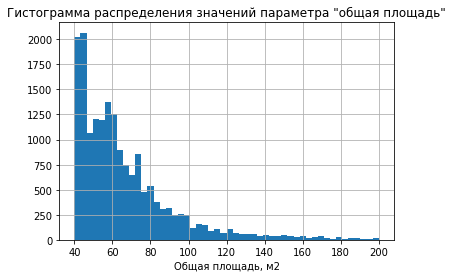

In [19]:
# Построим гистрограмму частот распределения значений:
pd.Series(df['total_area']).hist(bins=50, range = (40, 200))
plt.title('Гистограмма распределения значений параметра "общая площадь"')
plt.xlabel('Общая площадь, м2')
plt.show()

Из полученной гистограммы видно, что основная часть квартир из датасета имеет площадь от 20 до 55 м2. Также имеются квартиры с площадью свыше 200 м2- это могут быть выбросы, либо частные дома с большой площадью.

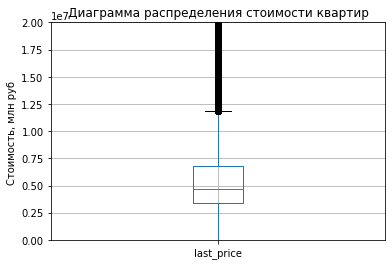

In [20]:
#Построим диаграмму размаха для параметра стоимость квартиры ('last_price'):
df_price = df[['last_price']]
df_price.boxplot()
plt.ylim(0, 20000000)
plt.title('Диаграмма распределения стоимости квартир')
plt.ylabel('Стоимость, млн руб ')
plt.show()

In [21]:
df_price.describe()

,last_price
count,"23,565.00"
mean,"6,540,058.26"
std,"10,910,934.72"
min,"12,190.00"
25%,"3,400,000.00"
50%,"4,646,000.00"
75%,"6,790,000.00"
max,"763,000,000.00"


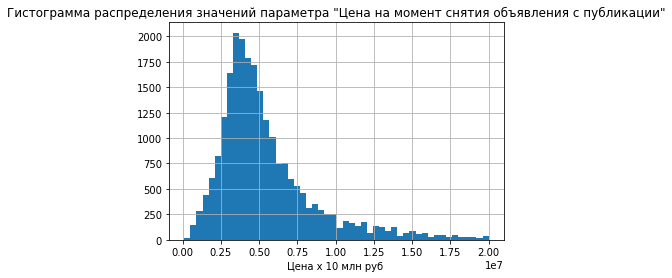

In [22]:
#Построим гистограмму частот для стоимости квартир:
pd.Series(df['last_price']).hist(bins=50, range = (100000, 20000000))
plt.title('Гистограмма распределения значений параметра "Цена на момент снятия объявления с публикации"')
plt.xlabel('Цена х 10 млн руб ')
plt.show()

 Из гистограммы видно, что стоимость квартир в датасете варьируется от примерно от 20000 до 80 млн руб, при этом больше всего квартир находится в диапазоне стоимости от 3 до 10 млн

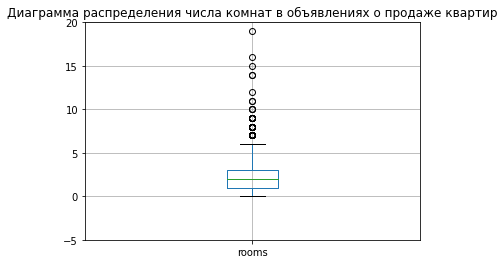

In [23]:
#Построим гистограмму для параметра число комнат квартиры ('rooms'):
#Диаграмма размаха данных для столбца 'rooms':
df_rooms = df[['rooms']]
df_rooms.boxplot()
plt.ylim(-5, 20)
plt.title('Диаграмма распределения числа комнат в объявлениях о продаже квартир')
plt.show()

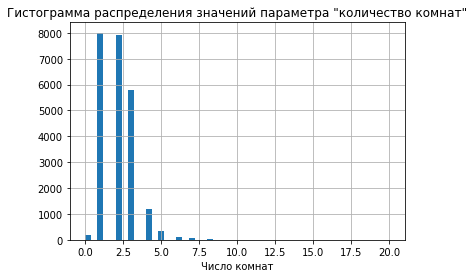

In [24]:
#Построим гистограмму частот:
pd.Series(df['rooms']).hist(bins=50, range = (0, 20))
plt.title('Гистограмма распределения значений параметра "количество комнат"')
plt.xlabel('Число комнат')
plt.show()

Из гистограммы видно, что больше всего для продажи в датасете выставлено одно- и двухкомнатных квартир.

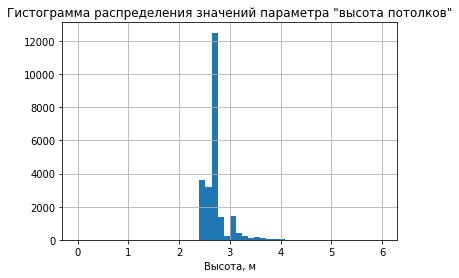

In [25]:
#Построим гистограмму для параметра "высота потолков" ('ceiling_height'):
pd.Series(df['ceiling_height']).hist(bins=50, range = (0, 6))
plt.title('Гистограмма распределения значений параметра "высота потолков"')
plt.xlabel('Высота, м')
plt.show()

Из гистограммы видно, что высота потолков, в основном, находится в пределах от 2 до 3 метров, но есть и квартиры с потолками выше 4м- возможно это выбросы.

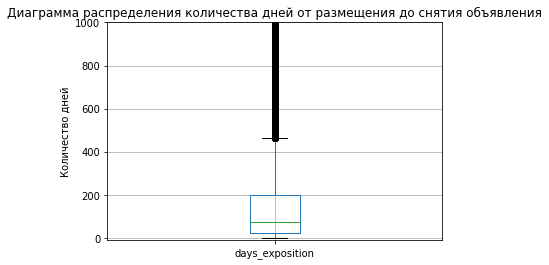

In [26]:
#Построим диаграмму размаха, чтобы посмотреть на рапределение количества дней до продажи квартир:
df_days_exposition = df[['days_exposition']]
df_days_exposition.boxplot()
plt.ylim(-10, 1000)
plt.title('Диаграмма распределения количества дней от размещения до снятия объявления')
plt.ylabel('Количество дней')
plt.show()

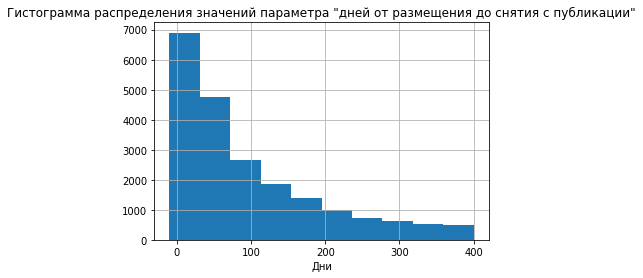

In [27]:
#Отбросим все значения свыше 400 и построим гистограмму:
pd.Series(df['days_exposition']).hist(bins=10, range = (-10, 400))
plt.title('Гистограмма распределения значений параметра "дней от размещения до снятия с публикации"')
plt.xlabel('Дни')
plt.show()

In [28]:
df_days_exposition.describe()

,days_exposition
count,"23,565.00"
mean,156.42
std,213.52
min,0.00
25%,22.00
50%,73.00
75%,198.00
max,"1,580.00"


**Вывод**: Среднее количество дней от публикации на сайте до снятия составляет 157, при этом медиана равна 74, то есть почти в 2 раза меньше. Судя по диаграмме размаха, нормальные значения расположены в диапазоне от 0 до 450, следовательно, все значения выше этого диапазона можно считать выбросами. О том, что в данных слишком много выбросов, также говорит величина стандартного отклонения std = 213.5. Можно сделать вывод о том, что большинство объявлений о продаже квартир находятся на сайте в диапазоне от 22 до 199 дней, то есть если объявление находилось на сайте в пределе от 22 до 199 дней и квартира продалась, то можно считать такую продажу быстрой. 

In [29]:
#Удалим редкие и выбивающиеся значения из столбцов общая площадь, цена, высота потолков, число комнат:
#Общая площадь квартиры < 125м2, цена на момент снятия с публикации- меньше 12 млн. руб., высота потолков- ниже 4 м, количество комнат - меньше 10:
df_query = df.query('20 < total_area < 125')
df_query = df_query.query('last_price < 12000000')
df_query = df_query.query('ceiling_height < 4')
df_query = df_query.query('rooms <= 10 ')

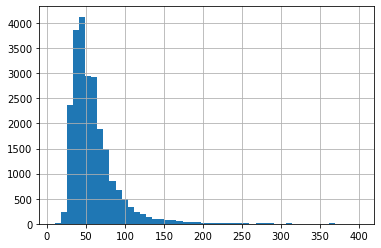

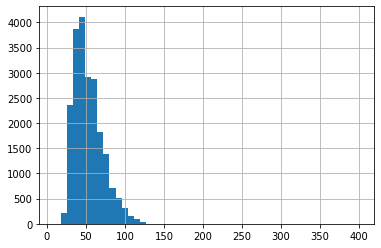

count   21,380.00
mean        53.00
std         18.20
min         20.10
25%         39.00
50%         49.10
75%         63.20
max        124.80
Name: total_area, dtype: float64

In [30]:
#Построим гистограммы для срезов и общего датасета и посмотрим есть ли изменения после фильтрации:
#Общая площадь:
pd.Series(df['total_area']).hist(bins=50, range = (10, 400))
plt.show()
pd.Series(df_query['total_area']).hist(bins=50, range = (10, 400))
plt.show()
df_query['total_area'].describe()

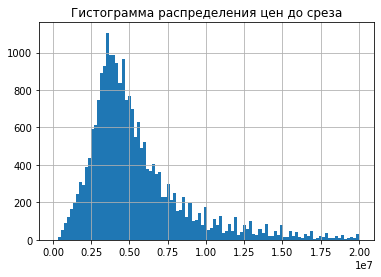

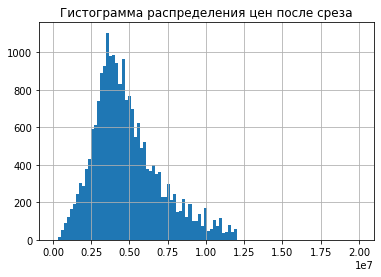

count   21,380.00
mean         1.92
std          0.90
min          0.00
25%          1.00
50%          2.00
75%          3.00
max          6.00
Name: rooms, dtype: float64

In [31]:
#Цена на момент снятия с публикации:
pd.Series(df['last_price']).hist(bins=100, range = (100000, 20000000))
plt.title('Гистограмма распределения цен до среза')
plt.show()
pd.Series(df_query['last_price']).hist(bins=100, range = (100000, 20000000))
plt.title('Гистограмма распределения цен после среза')
plt.show()
df_query['rooms'].describe()

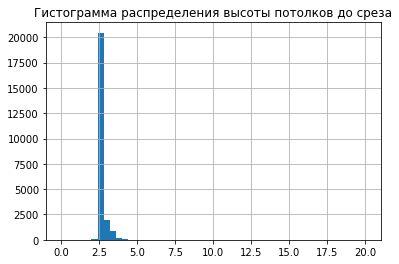

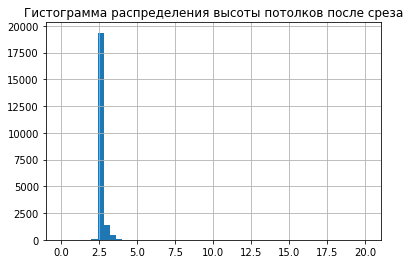

count   21,380.00
mean         2.67
std          0.17
min          1.00
25%          2.60
50%          2.65
75%          2.70
max          3.98
Name: ceiling_height, dtype: float64

In [32]:
#Высота потолков:
pd.Series(df['ceiling_height']).hist(bins=50, range = (0, 20))
plt.title('Гистограмма распределения высоты потолков до среза')
plt.show()
pd.Series(df_query['ceiling_height']).hist(bins=50, range = (0, 20))
plt.title('Гистограмма распределения высоты потолков после среза')
plt.show()
df_query['ceiling_height'].describe()

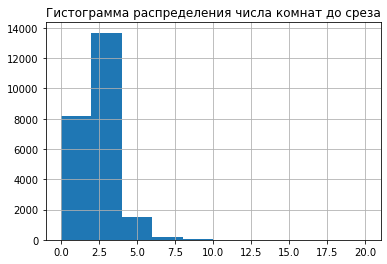

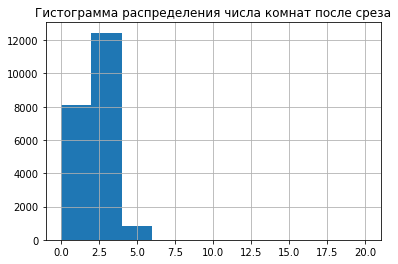

count   21,380.00
mean         1.92
std          0.90
min          0.00
25%          1.00
50%          2.00
75%          3.00
max          6.00
Name: rooms, dtype: float64

In [33]:
#Число комнат:
pd.Series(df['rooms']).hist(bins=10, range = (0, 20))
plt.title('Гистограмма распределения числа комнат до среза')
plt.show()
pd.Series(df_query['rooms']).hist(bins=10, range = (0, 20))
plt.title('Гистограмма распределения числа комнат после среза')
plt.show()
df_query['rooms'].describe()

**Вывод** После всех преобразований, можно заметить что на всех гистограммах уменьшился "хвост", при этом, если сравнить данные методом describe(), значения среднего и медианы стали приблизительно равны, значит, мы убрали все основные выбросы. 

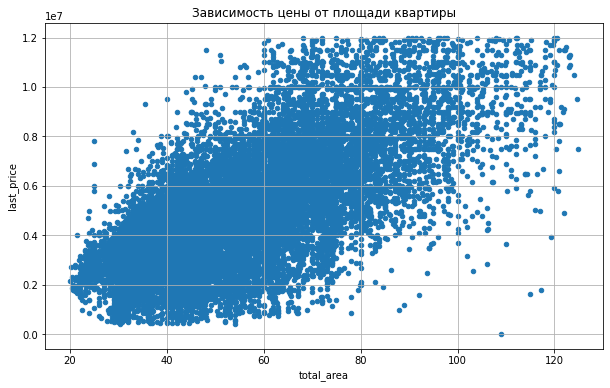

In [34]:
#Построим график зависимости цены от площади квартиры:
df_query.plot(title= 'Зависимость цены от площади квартиры', x='total_area',\
              y='last_price',kind='scatter', grid=True, figsize=(10, 6))
plt.show()

*Вывод*: На графике видна зависимость: чем больше общая площадь квартиры, тем выше цена.

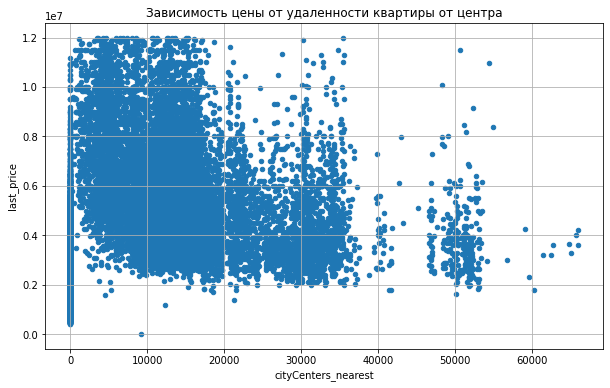

In [35]:
df_query.plot(title= 'Зависимость цены от удаленности квартиры от центра',\
              x='cityCenters_nearest', y='last_price', kind='scatter', grid=True, figsize=(10, 6))
plt.show()

*Вывод*: чем ближе квартира к центру, тем выше ее цена.

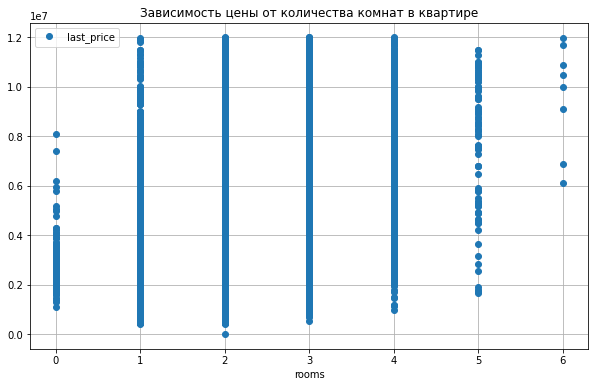

In [36]:
df_query.plot(title= 'Зависимость цены от количества комнат в квартире',\
              x='rooms', y='last_price', style='o', grid=True, figsize=(10, 6))
plt.show()

*Вывод*: Цена не зависит от числа комнат, в квартире может быть 0 или 1 комната, но цена ее при этом будет такой же, как и у квартиры с 3-5ю комнатами. Главными факторами остаются площадь квартиры и ее удаленность от центра.

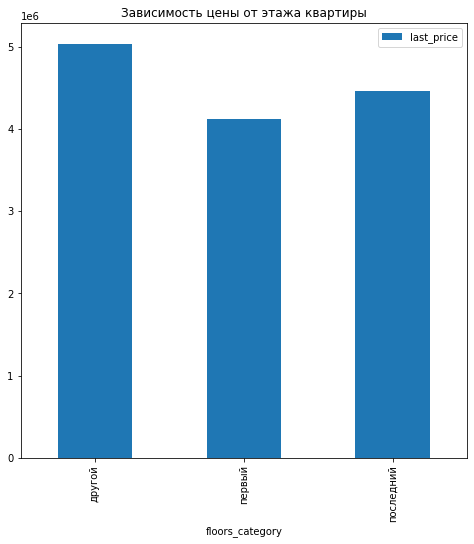

In [37]:
#Определим есть ли зависимость от этажа квартиры:
df_query_grouped = df_query.pivot_table(index='floors_category', values='last_price')
df_query_grouped.plot(title='Зависимость цены от этажа квартиры', y='last_price', kind='bar', figsize=(8, 8))
plt.show()

Квартиры на первом и последнем этажах стоят дешевле, чем квартиры на любом другом этаже. При этом цены на квартиры на первом этаже ниже остальных.

,weekday,month,year,last_price
weekday,1.00,0.00,-0.01,-0.05
month,0.00,1.00,-0.23,0.08
year,-0.01,-0.23,1.00,-0.14
last_price,-0.05,0.08,-0.14,1.00


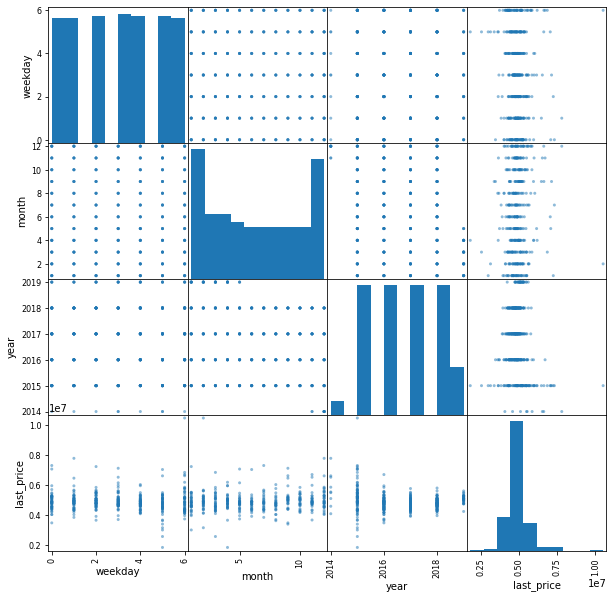

In [38]:
#Изучим, есть ли зависимость цены от даты размещения объявления:
df_query_grouped_2 = df_query.pivot_table(index=['weekday', 'month', 'year'], values='last_price')
df_query_grouped_reset = df_query_grouped_2.reset_index()
#df_query_grouped_reset
pd.plotting.scatter_matrix(df_query_grouped_reset, figsize=(10, 10))
df_query_grouped_reset.corr()

Цены на квартиры не зависят от дня недели, месяца и года размещения объявления о продаже на сайте, о чем говорит матрица диаграмм рассеяния и коэффициенты корреляции.

In [39]:
#Выделим 10 населенных пунктов с наибольшим числом объявлений:
df_s10 = df_query.pivot_table(index='locality_name', values='price_per_meter2', aggfunc=['count', 'mean'])
df_s10_reset = df_s10.reset_index()
df_s10_reset.columns = ['locality_name', 'count', 'mean_price_per_meter2']
df_10 = df_s10_reset.sort_values(by='count', ascending=False).head(10)
df_10

,locality_name,count,mean_price_per_meter2
33,Санкт-Петербург,13596,"105,602.76"
237,поселок Мурино,549,"85,600.19"
297,поселок Шушары,437,"78,517.65"
3,Всеволожск,392,"67,129.51"
32,Пушкин,336,"100,258.18"
13,Колпино,335,"75,221.88"
244,поселок Парголово,326,"90,332.26"
6,Гатчина,301,"68,729.58"
79,деревня Кудрово,297,"92,417.84"
4,Выборг,230,"58,242.34"


Среди 10 населенных пунктов с наибольшим количеством объявлений о продаже квартир, самая высокая стоимость жилья в Санкт-Петербурге: в среднем 105603 руб за м2 ,а самая низкая - в Выборге:58242 руб за м2.

In [40]:
#Выделим квартиры в Санкт-Петербурге:
df_spb = df_query.query('locality_name == "Санкт-Петербург"')
df_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ratio_kitchen_total,ratio_kitchen_mean,kitchen_area_new,price_per_meter2,time,weekday,month,year,floors_category,living_total_area
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,2.65,5,34.30,4,None,...,0.15,0.17,9.75,"92,785.71",2015-08-20,3,8,2015,другой,0.61
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,None,...,0.41,0.17,17.41,"100,000.00",2018-06-19,1,6,2018,другой,0.32
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,2.65,24,NaN,22,None,...,0.26,0.17,12.47,"110,544.69",2019-04-18,3,4,2019,другой,NaN
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,None,...,0.11,0.14,8.59,"88,524.59",2017-02-26,6,2,2017,другой,0.71
10,5,"5,050,000.00",39.60,2017-11-16T00:00:00,1,2.67,12,20.30,3,None,...,0.21,0.25,9.90,"127,525.25",2017-11-16,3,11,2017,другой,0.51


In [41]:
#Округлим расстояние до центра Санкт-Петербурга до километров:
df_spb['cityCenters_km'] = (df_spb['cityCenters_nearest'] / 1000).round(0)
#Проверим, правильно ли округляются значения:
df_spb_1 = df_spb[['cityCenters_nearest', 'cityCenters_km']]
df_spb_1

C:\Users\antig\AppData\Local\Temp\ipykernel_876\2770149954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spb['cityCenters_km'] = (df_spb['cityCenters_nearest'] / 1000).round(0)


,cityCenters_nearest,cityCenters_km
2,"13,933.00",14.00
4,"8,098.00",8.00
7,"11,634.00",12.00
9,"15,008.00",15.00
10,"13,878.00",14.00
...,...,...
23554,"14,428.00",14.00
23555,"16,081.00",16.00
23556,"6,263.00",6.00
23557,"4,489.00",4.00


In [42]:
df_spb_center1 = df_spb.query('0 <= cityCenters_km <= 5')
df_spb_center1['last_price'].describe()

count        1,577.00
mean     7,641,677.72
std      2,105,956.46
min      1,600,000.00
25%      6,100,000.00
50%      7,500,000.00
75%      9,200,000.00
max     11,999,000.00
Name: last_price, dtype: float64

In [43]:
df_spb_center2 = df_spb.query('5 <= cityCenters_km <= 10')
df_spb_center2['last_price'].describe()

count        2,904.00
mean     6,451,248.54
std      2,312,424.16
min         12,190.00
25%      4,550,000.00
50%      6,125,000.00
75%      8,000,000.00
max     11,999,000.00
Name: last_price, dtype: float64

In [44]:
df_spb_center3 = df_spb.query('5 <= cityCenters_km <= 8')
df_spb_center3['last_price'].describe()

count        1,735.00
mean     7,103,423.06
std      2,235,073.50
min      1,800,000.00
25%      5,405,000.00
50%      6,850,000.00
75%      8,721,680.00
max     11,999,000.00
Name: last_price, dtype: float64

In [45]:
df_spb_center5 = df_spb.query('7 <= cityCenters_km <= 10')
df_spb_center5['last_price'].describe()

count        1,918.00
mean     5,941,610.75
std      2,229,281.37
min         12,190.00
25%      4,192,500.00
50%      5,500,000.00
75%      7,300,000.00
max     11,999,000.00
Name: last_price, dtype: float64

Как видно из срезов, резкое снижение среднего и медианного значений цен квартир начинается на расстоянии до центра в 8 км, поэтому примем за центральную область диапазон от 0 до 8 км.

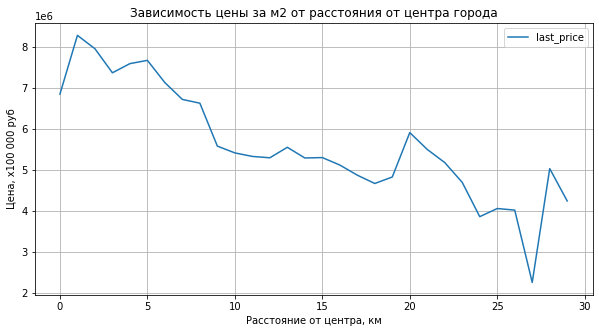

In [46]:
#Построим график изменения средней цены в центре за квадратный метр:
df_spb_pivot = df_spb.pivot_table(index='cityCenters_km', values='last_price').plot(grid=True, figsize=(10,5))
plt.title('Зависимость цены за м2 от расстояния от центра города')
plt.ylabel('Цена, х100 000 руб')
plt.xlabel('Расстояние от центра, км')
plt.show()

Анализируя график, можно сделать вывод о том, что самую высокую стоимость имеют квартиры, расположенные в диапазоне расстояний от 0 до 8 км от центра города.

In [47]:
#Выделим сегмент квартир в диапазоне расстояний от 0 до 10 км от центра Санкт-Петербурга:
df_spb_center = df_spb.query('0 <= cityCenters_km <= 8')
df_spb_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ratio_kitchen_mean,kitchen_area_new,price_per_meter2,time,weekday,month,year,floors_category,living_total_area,cityCenters_km
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,None,...,0.17,17.41,"100,000.00",2018-06-19,1,6,2018,другой,0.32,8.00
24,8,"6,500,000.00",97.20,2015-10-31T00:00:00,2,2.65,3,46.50,1,None,...,0.17,16.92,"66,872.43",2015-10-31,5,10,2015,первый,0.48,2.00
61,18,"7,990,000.00",74.00,2017-08-24T00:00:00,2,2.65,4,43.00,4,None,...,0.17,12.88,"107,972.97",2017-08-24,3,8,2017,последний,0.58,4.00
70,9,"3,400,000.00",30.00,2018-09-05T00:00:00,1,2.65,5,16.00,1,None,...,0.25,7.50,"113,333.33",2018-09-05,2,9,2018,первый,0.53,8.00
81,9,"10,949,000.00",68.00,2018-12-27T00:00:00,1,2.65,10,NaN,6,None,...,0.25,16.99,"161,014.71",2018-12-27,3,12,2018,другой,NaN,0.00


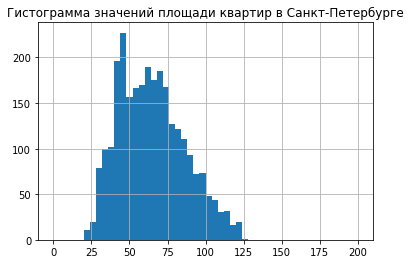

count   2,733.00
mean       64.50
std        21.58
min        20.30
25%        47.00
50%        62.20
75%        79.00
max       124.10
Name: total_area, dtype: float64

In [48]:
#Рассмотрим основные параметры квартир в центре Санкт-Петербурга.
#Площадь квартир:
pd.Series(df_spb_center['total_area']).hist(bins=50, range = (0, 200))
plt.title('Гистограмма значений площади квартир в Санкт-Петербурге')
plt.show()
df_spb_center['total_area'].describe()

*Вывод:* Больше всего объявлений о продаже квартир в выбранном сегменте с площадью от 30 до 75 м2.

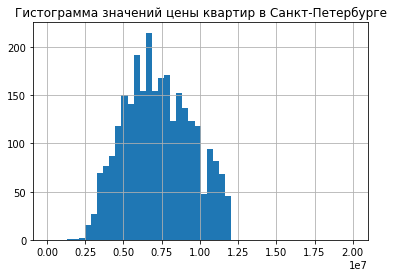

count        2,733.00
mean     7,294,635.27
std      2,201,873.69
min      1,600,000.00
25%      5,650,000.00
50%      7,150,000.00
75%      8,950,000.00
max     11,999,000.00
Name: last_price, dtype: float64

In [49]:
#Цена на момент снятия объявления с публикации:
pd.Series(df_spb_center['last_price']).hist(bins=50, range = (100000, 20000000))
plt.title('Гистограмма значений цены квартир в Санкт-Петербурге')
plt.show()
df_spb_center['last_price'].describe()

*Вывод:* средняя стоимость квартир в центре составляет приблизительно 7,2 млн руб, при этом больше всего к продаже предлагается квартир в диапазоне стоимости от 5 до 8 млн руб.

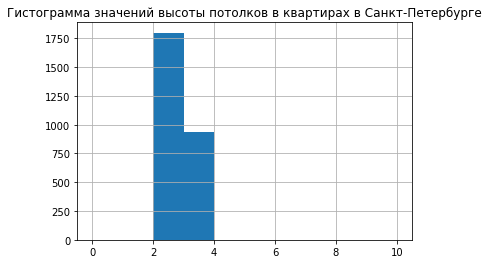

count   2,733.00
mean        2.85
std         0.29
min         2.40
25%         2.65
50%         2.70
75%         3.00
max         3.98
Name: ceiling_height, dtype: float64

In [50]:
#Высота потолков в квартирах:
pd.Series(df_spb_center['ceiling_height']).hist(bins=10, range = (0, 10))
plt.title('Гистограмма значений высоты потолков в квартирах в Санкт-Петербурге')
plt.show()
df_spb_center['ceiling_height'].describe()

*Вывод*: в выбранном сегменте высота потолков у квартир в большинстве случаев от 2х до 3х метров, в среднем- 2,7 метра.

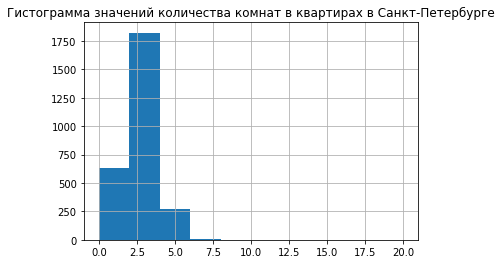

count   2,733.00
mean        2.27
std         0.98
min         0.00
25%         2.00
50%         2.00
75%         3.00
max         6.00
Name: rooms, dtype: float64

In [51]:
#Число комнат:
pd.Series(df_spb_center['rooms']).hist(bins=10, range = (0, 20))
plt.title('Гистограмма значений количества комнат в квартирах в Санкт-Петербурге')
plt.show()
df_spb_center['rooms'].describe()

*Вывод*: в центре больше всего объявлений о продаже 2х- и 4-хкомнатных квартир.

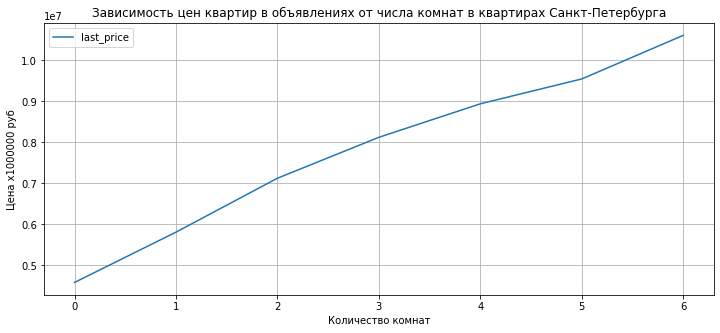

In [52]:
#Определим зависимость цены от следующих параметров:
#Число комнат
df_spb_center_m = df_spb_center.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(12, 5))
plt.title('Зависимость цен квартир в объявлениях от числа комнат в квартирах Санкт-Петербурга')
plt.ylabel('Цена х1000000 руб')
plt.xlabel('Количество комнат')
plt.show()

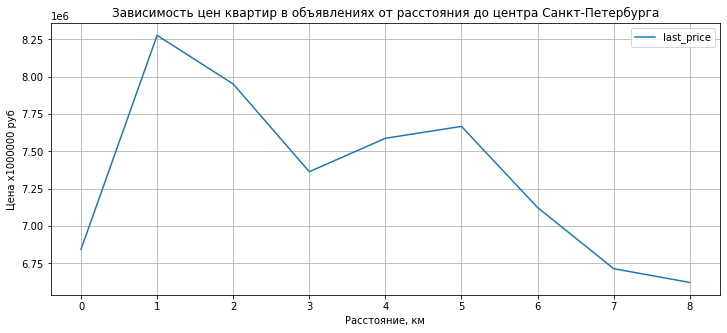

In [53]:
#Расстояние до центра
df_spb_center_m1 = df_spb_center.pivot_table(index='cityCenters_km', values='last_price').plot(grid=True, figsize=(12, 5))
plt.title('Зависимость цен квартир в объявлениях от расстояния до центра Санкт-Петербурга')
plt.ylabel('Цена х1000000 руб')
plt.xlabel('Расстояние, км')
plt.show()

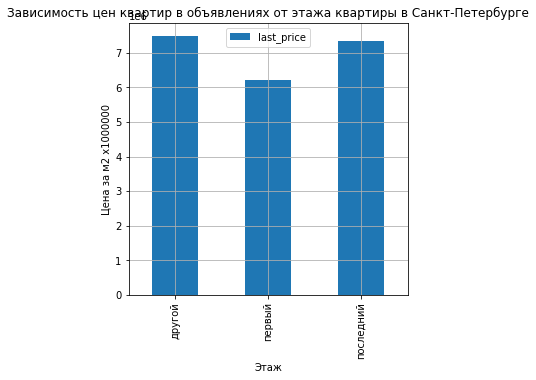

In [54]:
#Этаж квартиры
df_spb_center_m2 = df_spb_center.pivot_table(index='floors_category',\
                                             values='last_price').plot(kind='bar', grid=True, figsize=(5, 5))
plt.title('Зависимость цен квартир в объявлениях от этажа квартиры в Санкт-Петербурге')
plt.ylabel('Цена за м2 х1000000')
plt.xlabel('Этаж')
plt.show()

,weekday,month,year,last_price
weekday,1.00,0.01,0.08,-0.02
month,0.01,1.00,-0.24,0.03
year,0.08,-0.24,1.00,-0.06
last_price,-0.02,0.03,-0.06,1.00


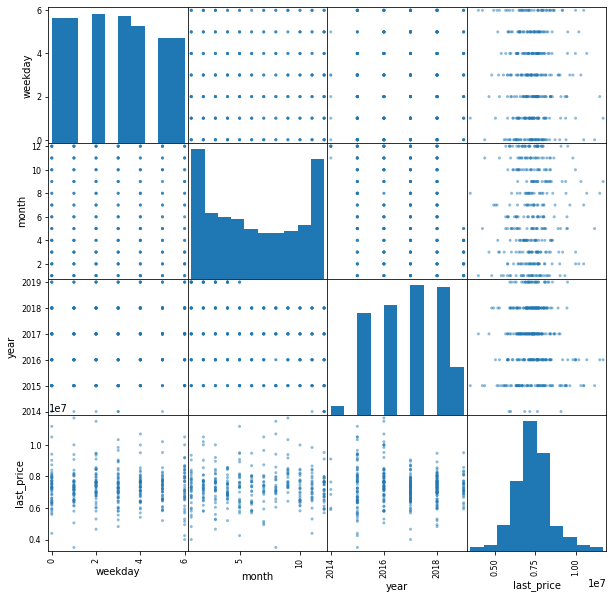

In [55]:
#Изучим, есть ли зависимость цены от даты размещения объявления:
df_spb_center_m3 = df_spb_center.pivot_table(index=['weekday', 'month', 'year'], values='last_price').reset_index()
df_spb_center_m3
pd.plotting.scatter_matrix(df_spb_center_m3, figsize=(10, 10))
df_spb_center_m3 .corr()

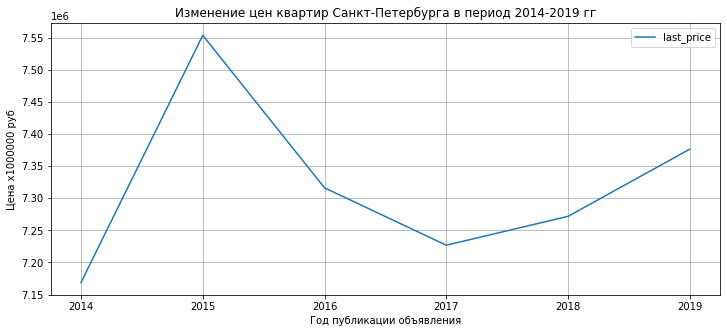

In [56]:
# Рассмотрим динамику изменения цен с 2014 по 2019 годы:
df_spb_center_m4 = df_spb_center.pivot_table(index='year',\
                                             values='last_price').plot(grid=True, figsize=(12, 5))
plt.title('Изменение цен квартир Санкт-Петербурга в период 2014-2019 гг')
plt.ylabel('Цена х1000000 руб')
plt.xlabel('Год публикации объявления')
plt.show()

*Вывод*: В центре Санкт-Петербурга больше всего объявлений о продаже 2 и 4-х комнатных квартир, при этом, чем дальше расположена квартира от центра, тем ниже ее стоимость. Также цена на квартиры, расположенные на первом этаже, ниже, чем на квартиры на последнем или другом этажах.День недели и месяц размещения объявления о продаже квартиры не влияли на ее итоговую стоимость, но если рассматривать зависимость от года размещения объявлений, то видно, что с 2014го года по 2016 наблюдается спад цен выставленных на продажу квартир, а после 2017го года снова начинается рост.

## Общий вывод

В ходе анализа объявлений о продаже квартир были сделаны следующие выводы:  
-Чаще других выставляются на продажу 2х и 3х комнатные квартиры.  
-Цены на квартиры, в основном, варьируются от 3 млн руб до 10 млн руб.  
-Стоимость квартиры больше зависит от следующих факторов: площади, удаленности от центра, количества комнат и этажа, при этом квартиры на первом этаже стоят существенно дешевле,чем на любом другом и последнем.  
-В основном на данном сайте объявления о продаже квартир находятся в диапазоне от 22 до 199 дней и,если день снятия объявления можно считать днем продажи квартиры, такие продажи можно назвать быстрыми.  
-День недели и месяц размещения объявлений не влияют на уровень цен, но в разные годы можно наблюдать рост цен на продаваемые квартиры,затем спад и снова рост.  
-Больше половины всех объявлений о продаже квартир составляет город Санкт-Петербург, поэтому его показатели существенно влияют на показатели других населенных пунктов.  
-В Санкт-Петербурге цена на квартиры возрастает при расположении квартир в радиусе от 0 до 8 км от центра.  
-Средняя стоимость квартир Санкт-Петербуга в размещенных объявлениях составляет примерно 7,2 млн руб.   
-Остальные рассматриваемые показатели для объявлений о продаже в Санкт-Петербурге имеют такие же зависимости как и в основном датасете. 